In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
IMG_SIZE = 224
BATCH_SIZE = 32

In [7]:
train_datagen =ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/alzeihmer/train',target_size=(IMG_SIZE, IMG_SIZE),batch_size=BATCH_SIZE,class_mode='categorical',subset='training')
val_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/alzeihmer/test',target_size=(IMG_SIZE ,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='categorical',subset='validation')


Found 184 images belonging to 4 classes.
Found 46 images belonging to 4 classes.


In [9]:
class_indices = train_generator.class_indices
class_names=list(class_indices.keys())

print(class_indices)
print(class_names)

{'mild': 0, 'moderate': 1, 'non': 2, 'very mild': 3}
['mild', 'moderate', 'non', 'very mild']


In [13]:
model = keras.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(IMG_SIZE, IMG_SIZE, 3)),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs=5, validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 55s 10s/step - accuracy: 0.2211 - loss: 3.8331 - val_accuracy: 0.0435 - val_loss: 1.4016
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.2855 - loss: 1.3806 - val_accuracy: 0.0435 - val_loss: 1.4346
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.4663 - loss: 1.3386 - val_accuracy: 0.0435 - val_loss: 1.8292
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.4870 - loss: 1.1579 - val_accuracy: 0.0435 - val_loss: 2.4715
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.6322 - loss: 0.9630 - val_accuracy: 0.0435 - val_loss: 4.5665


In [17]:
model.save('/content/drive/MyDrive/alzeihmer/Multiclass.h5')

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model = load_model('/content/drive/MyDrive/alzeihmer/Multiclass.h5')
print("Model Loaded Successfully")

Model Loaded Successfully


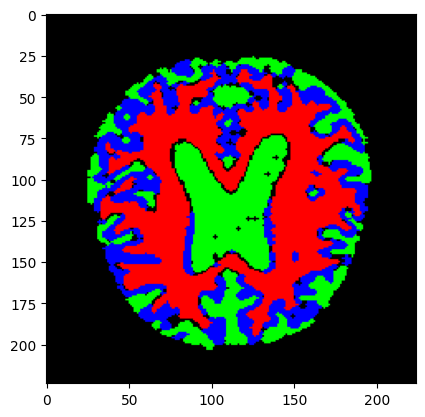

In [20]:
test_image_path="/content/drive/MyDrive/alzeihmer/test/mild/mildDem0.png"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [21]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255

In [22]:
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
[[0.0022704  0.99195707 0.00434833 0.00142416]]


In [23]:
prediction = model.predict(img_array)
ind = np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
moderate
